In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Master_CSV(in).csv')
data

Mounted at /content/drive


<ipython-input-3-daa29c9b0cf5>:2: DtypeWarning: Columns (4,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,45,46,47,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,136,137,138,139,140,141,142,143,144,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,302,303,304,305,306,312,313,314,322,323,372,373,37

,Global_Id,Web,Name,Employees,Business_Description,Data_Source,Contract_Manufacturer,Product_Manufacturer,Industry_1,Industry_2,...,NAICS_Description_1,NAICS_Description_2,NAICS_Description_3,NAICS_Description_4,NAICS_Description_5,NAICS_Description_6,NAICS_Description_7,NAICS_Description_8,NAICS_Description_9,NAICS_Description_10
0,westindiesvalve_dhs,www.westindiesvalve.com,WEST INDIES VALVE AND MACHINE WORK CORPORATION,0.0,NaN,DHS,No,No,NaN,NaN,...,OTHER METAL VALVE AND PIPE FITTING MANUFACTURING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101pipe_dhs,www.101pipe.com,"101 VERTICAL FABRICATION, INC.",50.0,NaN,DHS,No,Yes,NaN,NaN,...,FABRICATED PIPE AND PIPE FITTING MANUFACTURING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,149401-us_mskg,www.149401-us.all.biz,149401-US,NaN,NaN,MSKG,No,Yes,Transportation Industry,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1776fabrication_mskg,www.1776fabrication.com,1776 Fabrication,NaN,NaN,MSKG,Yes,Yes,Automotive Industry,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1dietech_mskg,www.1dietech.com,1Dietech.,NaN,NaN,MSKG,Yes,Yes,Automotive Industry,Furniture Industry,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,windigosigns_d&b,www.windigosigns.com,windigosigns,NaN,"Windigo Signs, Inc. is primarily engaged in ma...",D&B,No,Yes,NaN,NaN,...,Sign Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14742,xantusb_d&b,www.xantusb.openfos.com,xantusb.openfos,NaN,Xantus Business Systems Llc is primarily engag...,D&B,No,Yes,NaN,NaN,...,Commercial Printing (except Screen and Books),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14743,vicivisionamerica_d&b,www.vicivisionamerica.com,vicivisionamerica,NaN,Vicivision America Llc is primarily engaged in...,D&B,No,Yes,NaN,NaN,...,Commercial and Service Industry Machinery Manu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14744,infineon_d&b,www-blue.infineon.com,www-blue.infineon,NaN,Infineon Technologies Americas Corp. is primar...,D&B,NaN,NaN,NaN,NaN,...,Semiconductor and Related Device Manufacturing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
grouped_data = {}

for col in data.columns:
    prefix = ''.join(filter(str.isalpha, col))
    # print(prefix)
    if prefix not in grouped_data:
        grouped_data[prefix] = []
    cleaned_values = data[col].tolist()
    if cleaned_values:
        grouped_data[prefix].append(cleaned_values)

In [5]:
grouped_data['Industry'][0]

[nan,
 nan,
 'Transportation Industry',
 'Automotive Industry',
 'Automotive Industry',
 'Construction Industry',
 'Construction Industry',
 nan,
 nan,
 nan,
 'Military Industry',
 'Mining Industry',
 nan,
 'Professional Services Industry',
 'Military Industry',
 nan,
 'Automotive Industry',
 nan,
 'Military Industry',
 'Government Industry',
 'Recycling Industry',
 nan,
 'Military Industry',
 'Government Industry',
 'Military Industry',
 nan,
 nan,
 'Military Industry',
 'Furniture Industry',
 'Government Industry',
 'Professional Services Industry',
 nan,
 nan,
 'Military Industry',
 'Construction Industry',
 nan,
 'Government Industry',
 nan,
 'Military Industry',
 nan,
 nan,
 'Professional Services Industry',
 nan,
 nan,
 'Military Industry',
 nan,
 'Automotive Industry',
 nan,
 'Military Industry',
 nan,
 'Military Industry',
 nan,
 nan,
 'Construction Industry',
 'Military Industry',
 'Government Industry',
 nan,
 'Government Industry',
 'Construction Industry',
 'Military Indust

In [6]:
for key, values in grouped_data.items():
    # print(len(values))
    # print(values)
    # if key == 'Industry':
    #     print(list(map(list, zip(*values))))
    # print(temp)
    temp = list(map(list, zip(*values)))
    for i in range(len(temp)):
        temp[i] = [x for x in temp[i] if str(x) != 'nan']
    grouped_data[key] = temp

In [8]:
df = pd.DataFrame(grouped_data)
df

,GlobalId,Web,Name,Employees,BusinessDescription,DataSource,ContractManufacturer,ProductManufacturer,Industry,Certification,...,City,County,State,Zip,Latitude,Longitude,Phone,Fax,NAICSCode,NAICSDescription
0,[westindiesvalve_dhs],[www.westindiesvalve.com],[WEST INDIES VALVE AND MACHINE WORK CORPORATION],[0.0],[],[DHS],[No],[No],[],[ASME Certificate],...,[Penuelas],[Penuelas],[PR],[],[18.0054364],[-66.7276429],[(787) 836-1707],[NOT AVAILABLE],[332919.0],[OTHER METAL VALVE AND PIPE FITTING MANUFACTUR...
1,[101pipe_dhs],[www.101pipe.com],"[101 VERTICAL FABRICATION, INC.]",[50.0],[],[DHS],[No],[Yes],[],[],...,[Fontana],[San Bernardino],[California],[],[34.0677902],[-117.4708951],[(909) 428-6000],[(909) 428-4535],[332996.0],[FABRICATED PIPE AND PIPE FITTING MANUFACTURING]
2,[149401-us_mskg],[www.149401-us.all.biz],[149401-US],[],[],[MSKG],[No],[Yes],[Transportation Industry],[ISO 9001 Certificate],...,[],[],[],[],[],[],[],[],[],[]
3,[1776fabrication_mskg],[www.1776fabrication.com],[1776 Fabrication],[],[],[MSKG],[Yes],[Yes],[Automotive Industry],[],...,[],[],[],[],[],[],[],[],[],[]
4,[1dietech_mskg],[www.1dietech.com],[1Dietech.],[],[],[MSKG],[Yes],[Yes],"[Automotive Industry, Furniture Industry]",[IATF 16949 Certificate],...,[Carrollton],[],[Georgia],[],[33.566767],[-85.078863],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,[windigosigns_d&b],[www.windigosigns.com],[windigosigns],[],"[Windigo Signs, Inc. is primarily engaged in m...",[D&B],[No],[Yes],[Aluminum],[],...,[Tempe],[Maricopa],[Arizona],[],[],[],[1-844-946-3446],[],[339950.0],[Sign Manufacturing]
14742,[xantusb_d&b],[www.xantusb.openfos.com],[xantusb.openfos],[],[Xantus Business Systems Llc is primarily enga...,[D&B],[No],[Yes],[],[],...,[Sierra Vista],[Cochise],[Arizona],[],[],[],[1-520-459-7809],[],[323111.0],[Commercial Printing (except Screen and Books)]
14743,[vicivisionamerica_d&b],[www.vicivisionamerica.com],[vicivisionamerica],[],[Vicivision America Llc is primarily engaged i...,[D&B],[No],[Yes],[],[],...,[Scottsdale],[Maricopa],[Arizona],[],[],[],[1-480-212-5172],[],[333310.0],[Commercial and Service Industry Machinery Man...
14744,[infineon_d&b],[www-blue.infineon.com],[www-blue.infineon],[],[Infineon Technologies Americas Corp. is prima...,[D&B],[],[],"[Concrete, Lead, Titanium]",[],...,"[Mesa, Chandler]",[Maricopa],[Arizona],[],[],[],"[1-480-655-7701, 1-480-627-5700]",[],[334413.0],[Semiconductor and Related Device Manufacturing]


In [9]:
len(df.columns)

25

In [10]:
df['Product'].value_counts()

,count
Product,
[],5846
"[Polyethylene Septic Tanks, Polyethylene Septic Holding Tanks]",26
[Wire Forms],7
"[Products, Components]",6
"[Parallels® Desktop for Mac, Parallels® Desktop for Windows and Linux, Parallels® Server, Parallels® Container]",3
...,...
"[Elevator Cabs, Entrance Frames, Door Panels, Laminated Plastic Panels, Laminated Safety Glass, Kick Plates, Isolation Brackets, Stiles, Mullions, Transoms, Protection Pads, Safety Planks, Handrail Brackets, Stainless Steel Components, Bronze Alloys, Wainscot Panels, Light Fixtures, Hydraulic Cylinders, Structural Beams, Electrical Components]",1
"[Titanium, Aluminum, Stainless Steel]",1
"[Metal Finishing Services, Bronze Flatware, Hollowware, Recognition Awards, Agricultural Products, Highland Cattle, Training Materials, Pilot Products]",1


In [11]:
len(df.columns), df.columns

(25,
 Index(['GlobalId', 'Web', 'Name', 'Employees', 'BusinessDescription',
        'DataSource', 'ContractManufacturer', 'ProductManufacturer', 'Industry',
        'Certification', 'ProcessCapability', 'MaterialCapability',
        'BusinessStatus', 'Product', 'Address', 'City', 'County', 'State',
        'Zip', 'Latitude', 'Longitude', 'Phone', 'Fax', 'NAICSCode',
        'NAICSDescription'],
       dtype='object'))

In [12]:
# df.to_csv('./Desktop/temp_manu.csv')

In [13]:
for i in range(len(temp)):
    for x in temp[i]:
        print(x)

OTHER METAL VALVE AND PIPE FITTING MANUFACTURING
FABRICATED PIPE AND PIPE FITTING MANUFACTURING
INDUSTRIAL PATTERN MANUFACTURING
METAL COATING, ENGRAVING (EXCEPT JEWELRY AND SILVERWARE), AND ALLIED SERVICES TO MANUFACTURERS
METAL WINDOW AND DOOR MANUFACTURING
FABRICATED STRUCTURAL METAL MANUFACTURING
SHEET METAL WORK MANUFACTURING
ELECTROPLATING, PLATING, POLISHING, ANODIZING AND COLORING
OTHER METAL CONTAINER MANUFACTURING
MACHINE SHOPS
SHEET METAL WORK MANUFACTURING
MACHINE SHOPS
SHEET METAL WORK MANUFACTURING
MACHINE SHOPS
SHEET METAL WORK MANUFACTURING
MACHINE SHOPS
OTHER FABRICATED WIRE PRODUCT MANUFACTURING
ELECTROPLATING, PLATING, POLISHING, ANODIZING AND COLORING
SHEET METAL WORK MANUFACTURING
ORNAMENTAL AND ARCHITECTURAL METAL WORK MANUFACTURING
ORNAMENTAL AND ARCHITECTURAL METAL WORK MANUFACTURING
OTHER FABRICATED WIRE PRODUCT MANUFACTURING
MACHINE SHOPS
ELECTROPLATING, PLATING, POLISHING, ANODIZING AND COLORING
HARDWARE MANUFACTURING
ELECTROPLATING, PLATING, POLISHING, ANODI

In [14]:
cities = {}
for i in df['City']:
    if i != []:
        try:
            cities[i[0]] += 1
        except:
            cities[i[0]] = 1
cities

{'Penuelas': 1,
 'Fontana': 5,
 'Carrollton': 8,
 'Oceanport': 1,
 'Waukesha': 18,
 'Franklin': 18,
 'Chatsworth': 15,
 'Wilmington': 7,
 'Independence': 10,
 'Tyler': 3,
 'Des Plaines': 13,
 'Windsor': 4,
 'Islandia': 1,
 'Merritt Island': 2,
 'Orange': 23,
 'Los Angeles': 39,
 'White City': 2,
 'Vancouver': 9,
 'Beaumont': 10,
 'Rockford': 49,
 'Lakewood': 4,
 'North Platte': 1,
 'Morgan Hill': 6,
 'Augusta': 5,
 'San Jose': 32,
 'New Britain': 3,
 'Dallas': 37,
 'New Holstein': 1,
 'Mount Clemens': 2,
 'Hays': 1,
 'Chicopee': 1,
 'Anchorage': 6,
 'Santa Clara': 28,
 'Redford': 5,
 'Nashville': 16,
 'Tampa': 20,
 'Compton': 10,
 'Oak Creek': 13,
 'Ontario': 17,
 'Fort Worth': 41,
 'Houston': 182,
 'Bethesda': 1,
 'Frankford': 1,
 'St Paul': 2,
 'Rapid City': 7,
 'La Marque': 2,
 'Denison': 4,
 'Malvern': 3,
 'Gardena': 26,
 'Southampton': 5,
 'Broadview': 8,
 'Sidney': 6,
 'Louisville': 37,
 'Temecula': 4,
 'Woodbridge': 1,
 'Northbrook': 6,
 'Santa Ana': 36,
 'Moopark': 1,
 'Bensenv

In [15]:
states = {}
for i in df['State']:
    if i != []:
        try:
            states[i[0]] += 1
        except:
            states[i[0]] = 1
states

{'PR': 8,
 'California': 1070,
 'Georgia': 185,
 'New Jersey': 81,
 'Wisconsin': 522,
 'Ohio': 422,
 'North Carolina': 75,
 'Missouri': 223,
 'Texas': 658,
 'Illinois': 897,
 'New York': 110,
 'Florida': 189,
 'Oregon': 153,
 'Washington': 169,
 'Colorado': 117,
 'Nebraska': 72,
 'Connecticut': 74,
 'Michigan': 662,
 'Kansas': 84,
 'Massachusetts': 83,
 'Alaska': 9,
 'Tennessee': 169,
 'Maryland': 28,
 'Delaware': 8,
 'Minnesota': 357,
 'South Dakota': 38,
 'Pennsylvania': 202,
 'Kentucky': 85,
 'VIRGINIA': 9,
 'Mississippi': 50,
 'Nevada': 50,
 'OHIO': 68,
 'OKLAHOMA': 4,
 'Arizona': 3120,
 'New Mexico': 35,
 'Indiana': 390,
 'Utah': 100,
 'Arkansas': 73,
 'Oklahoma': 124,
 'MICHIGAN': 14,
 'South Carolina': 89,
 '28054': 1,
 'Idaho': 38,
 'CALIFORNIA': 28,
 'Iowa': 134,
 'Alabama': 147,
 'Louisiana': 111,
 'UT.': 1,
 'TEXAS': 14,
 'PENNSYLVANIA': 4,
 'Maine': 11,
 'FLORIDA': 7,
 'INDIA': 3,
 'Montana': 15,
 'ILLINOIS': 11,
 'Rhode Island': 9,
 'North Dakota': 22,
 'LOUISIANA': 2,
 'D

In [16]:
states = {k: v for k, v in sorted(states.items(), key=lambda item: item[1], reverse=True)}
states

{'Arizona': 3120,
 'California': 1070,
 'Illinois': 897,
 'Michigan': 662,
 'Texas': 658,
 'Wisconsin': 522,
 'Ohio': 422,
 'Indiana': 390,
 'Minnesota': 357,
 'Missouri': 223,
 'Pennsylvania': 202,
 'Florida': 189,
 'Georgia': 185,
 'Washington': 169,
 'Tennessee': 169,
 'Oregon': 153,
 'Alabama': 147,
 'Iowa': 134,
 'Oklahoma': 124,
 'Colorado': 117,
 'Louisiana': 111,
 'New York': 110,
 'Utah': 100,
 'South Carolina': 89,
 'Kentucky': 85,
 'Kansas': 84,
 'Massachusetts': 83,
 'New Jersey': 81,
 'North Carolina': 75,
 'Connecticut': 74,
 'Arkansas': 73,
 'Nebraska': 72,
 'ARIZONA': 69,
 'OHIO': 68,
 'Mississippi': 50,
 'Nevada': 50,
 'South Dakota': 38,
 'Idaho': 38,
 'New Mexico': 35,
 'Virginia': 34,
 'New Hampshire': 33,
 'Maryland': 28,
 'CALIFORNIA': 28,
 'North Dakota': 22,
 'Montana': 15,
 'MICHIGAN': 14,
 'TEXAS': 14,
 'Wyoming': 14,
 'NEW YORK': 13,
 'Hawaii': 12,
 'WISCONSIN': 12,
 'INDIANA': 12,
 'Maine': 11,
 'ILLINOIS': 11,
 'Alaska': 9,
 'VIRGINIA': 9,
 'Rhode Island': 

In [17]:
len(states)

138

In [18]:
len(cities)

2823

In [19]:
states_plot = dict(itertools.islice(states.items(), 30))

In [20]:
states_plot

{'Arizona': 3120,
 'California': 1070,
 'Illinois': 897,
 'Michigan': 662,
 'Texas': 658,
 'Wisconsin': 522,
 'Ohio': 422,
 'Indiana': 390,
 'Minnesota': 357,
 'Missouri': 223,
 'Pennsylvania': 202,
 'Florida': 189,
 'Georgia': 185,
 'Washington': 169,
 'Tennessee': 169,
 'Oregon': 153,
 'Alabama': 147,
 'Iowa': 134,
 'Oklahoma': 124,
 'Colorado': 117,
 'Louisiana': 111,
 'New York': 110,
 'Utah': 100,
 'South Carolina': 89,
 'Kentucky': 85,
 'Kansas': 84,
 'Massachusetts': 83,
 'New Jersey': 81,
 'North Carolina': 75,
 'Connecticut': 74}

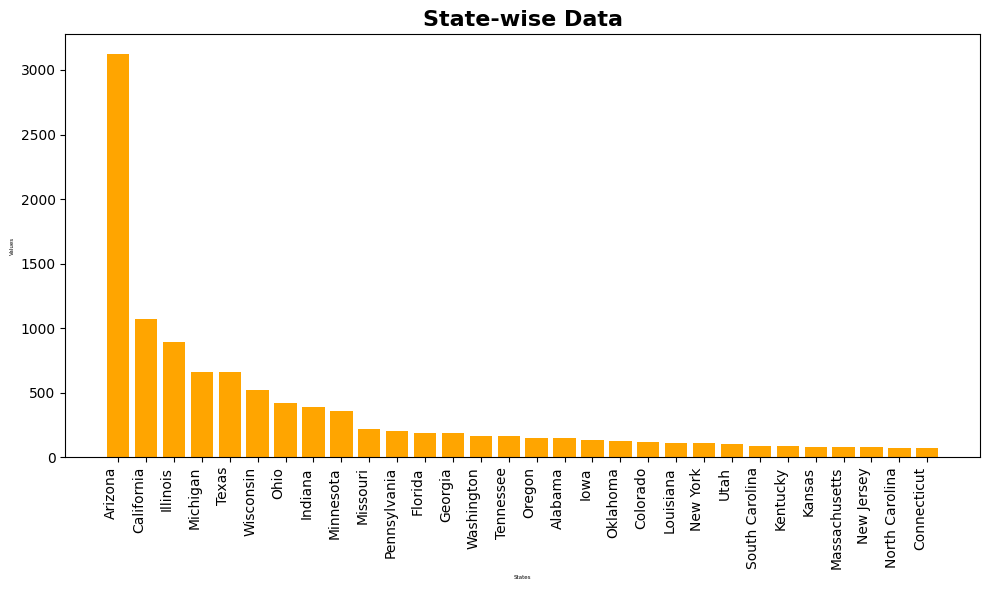

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(states_plot.keys(), states_plot.values(), color='orange')
plt.title('State-wise Data', fontsize=16, fontweight='bold')
plt.xlabel('States', fontsize=4)
plt.ylabel('Values', fontsize=4)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

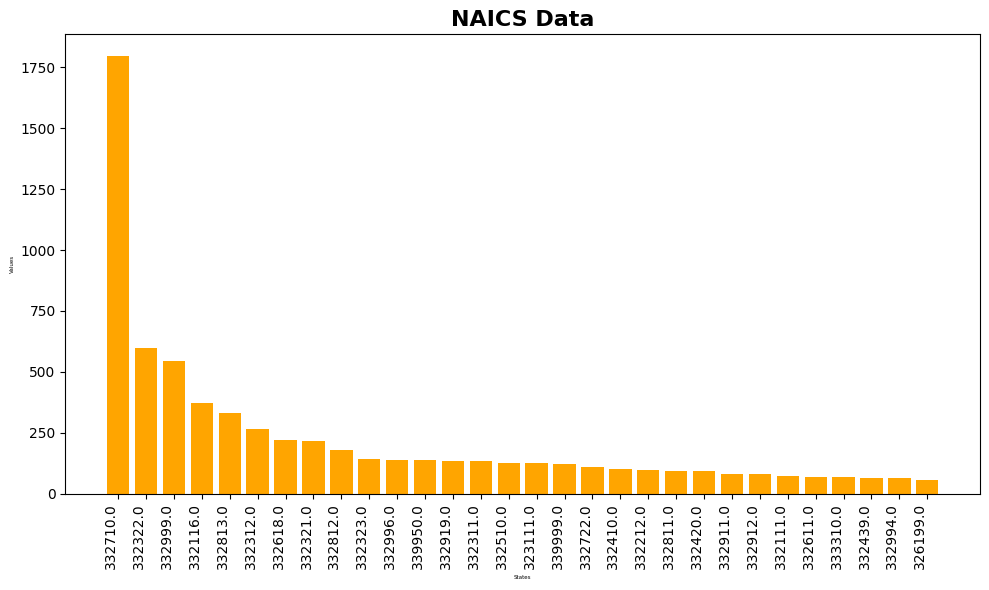

In [22]:
# NAICSCode
states = {}
for i in df['NAICSCode']:
    if i != []:
        try:
            states[str(i[0])] += 1
        except:
            states[str(i[0])] = 1
states = {k: v for k, v in sorted(states.items(), key=lambda item: item[1], reverse=True)}
states_plot = dict(itertools.islice(states.items(), 30))
plt.figure(figsize=(10, 6))
plt.bar(states_plot.keys(), states_plot.values(), color='orange')
plt.title('NAICS Data', fontsize=16, fontweight='bold')
plt.xlabel('States', fontsize=4)
plt.ylabel('Values', fontsize=4)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [23]:
states_plot

{'332710.0': 1796,
 '332322.0': 598,
 '332999.0': 545,
 '332116.0': 370,
 '332813.0': 332,
 '332312.0': 266,
 '332618.0': 220,
 '332321.0': 216,
 '332812.0': 180,
 '332323.0': 141,
 '332996.0': 140,
 '339950.0': 136,
 '332919.0': 133,
 '332311.0': 133,
 '332510.0': 126,
 '323111.0': 124,
 '339999.0': 123,
 '332722.0': 111,
 '332410.0': 100,
 '332212.0': 98,
 '332811.0': 92,
 '332420.0': 91,
 '332911.0': 82,
 '332912.0': 79,
 '332111.0': 74,
 '332611.0': 69,
 '333310.0': 68,
 '332439.0': 63,
 '332994.0': 62,
 '326199.0': 56}

In [24]:
# NAICSCode
states = {}
for i in df['DataSource']:
    if i != []:
        try:
            states[str(i[0])] += 1
        except:
            states[str(i[0])] = 1
states = {k: v for k, v in sorted(states.items(), key=lambda item: item[1], reverse=True)}
states

{'DHS': 6092, 'MSKG': 4991, 'D&B': 2652, 'AZ': 1011}

<ipython-input-25-1fd6ab2c9d77>:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


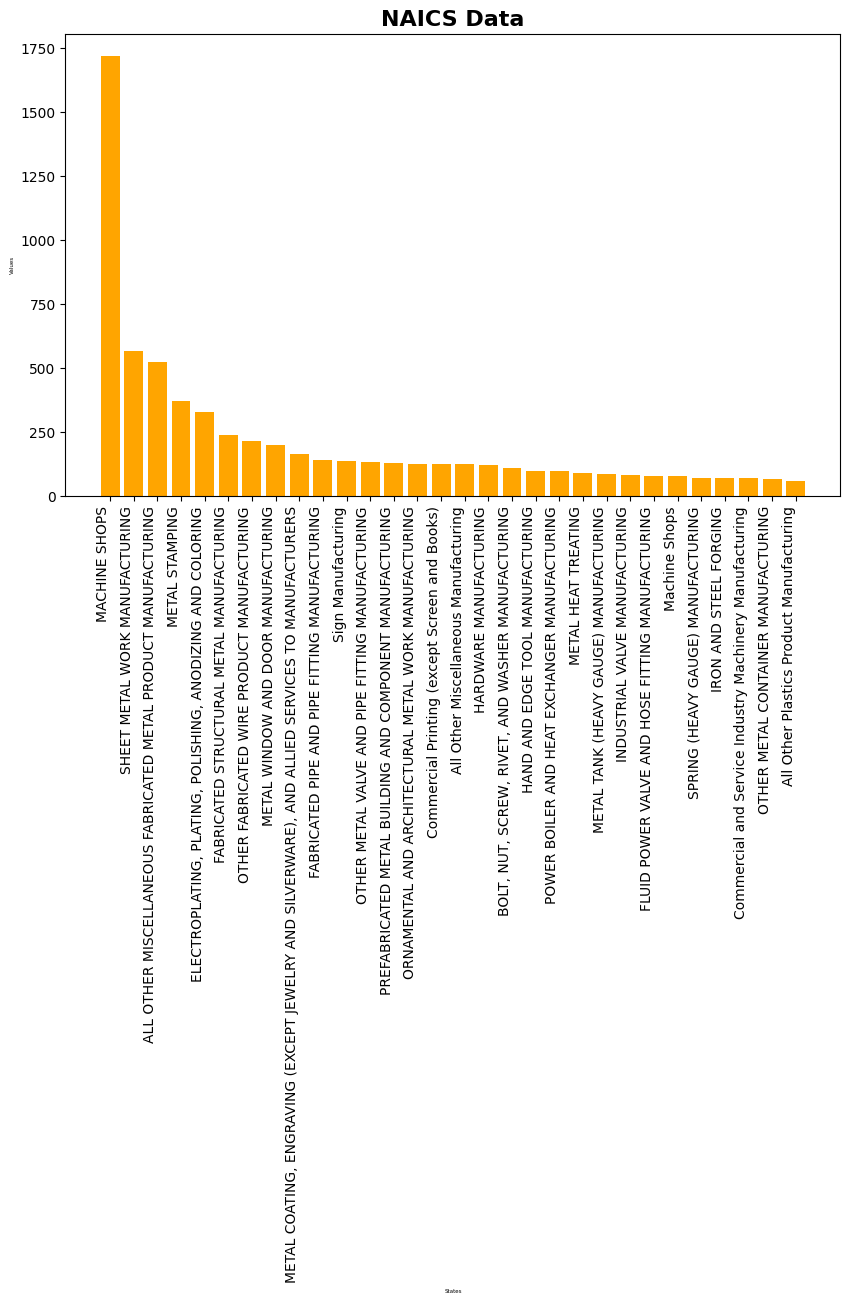

In [25]:
states = {}
for i in df['NAICSDescription']:
    if i != []:
        try:
            states[str(i[0])] += 1
        except:
            states[str(i[0])] = 1
states = {k: v for k, v in sorted(states.items(), key=lambda item: item[1], reverse=True)}
states_plot = dict(itertools.islice(states.items(), 30))
plt.figure(figsize=(10, 6))
plt.bar(states_plot.keys(), states_plot.values(), color='orange')
plt.title('NAICS Data', fontsize=16, fontweight='bold')
plt.xlabel('States', fontsize=4)
plt.ylabel('Values', fontsize=4)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [26]:
# NAICS Code Demo
# 332710	Machine Shops
# 332322	Sheet Metal Work Manufacturing
# 332999	All Other Miscellaneous Fabricated Metal Product Manufacturing
# 332116  None
# 332813	Electroplating, Plating, Polishing, Anodizing, and Coloring
# 332312	Fabricated Structural Metal Manufacturing

In [28]:
len(df)

14746

In [29]:
df = pd.read_csv('/content/drive/MyDrive/temp_manu.csv').drop(columns=['Unnamed: 0'])
df

,GlobalId,Web,Name,Employees,BusinessDescription,DataSource,ContractManufacturer,ProductManufacturer,Industry,Certification,...,City,County,State,Zip,Latitude,Longitude,Phone,Fax,NAICSCode,NAICSDescription
0,['westindiesvalve_dhs'],['www.westindiesvalve.com'],['WEST INDIES VALVE AND MACHINE WORK CORPORATI...,[0.0],[],['DHS'],['No'],['No'],[],['ASME Certificate'],...,['Penuelas'],['Penuelas'],['PR'],[],[18.0054364],[-66.7276429],['(787) 836-1707'],['NOT AVAILABLE'],[332919.0],['OTHER METAL VALVE AND PIPE FITTING MANUFACTU...
1,['101pipe_dhs'],['www.101pipe.com'],"['101 VERTICAL FABRICATION, INC.']",[50.0],[],['DHS'],['No'],['Yes'],[],[],...,['Fontana'],['San Bernardino'],['California'],[],[34.0677902],[-117.4708951],['(909) 428-6000'],['(909) 428-4535'],[332996.0],['FABRICATED PIPE AND PIPE FITTING MANUFACTURI...
2,['149401-us_mskg'],['www.149401-us.all.biz'],['149401-US'],[],[],['MSKG'],['No'],['Yes'],['Transportation Industry'],['ISO 9001 Certificate'],...,[],[],[],[],[],[],[],[],[],[]
3,['1776fabrication_mskg'],['www.1776fabrication.com'],['1776 Fabrication'],[],[],['MSKG'],['Yes'],['Yes'],['Automotive Industry'],[],...,[],[],[],[],[],[],[],[],[],[]
4,['1dietech_mskg'],['www.1dietech.com'],['1Dietech.'],[],[],['MSKG'],['Yes'],['Yes'],"['Automotive Industry', 'Furniture Industry']",['IATF 16949 Certificate'],...,['Carrollton'],[],['Georgia'],[],[33.566767],[-85.078863],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14741,['windigosigns_d&b'],['www.windigosigns.com'],['windigosigns'],[],"['Windigo Signs, Inc. is primarily engaged in ...",['D&B'],['No'],['Yes'],['Aluminum'],[],...,['Tempe'],['Maricopa'],['Arizona'],[],[],[],['1-844-946-3446'],[],[339950.0],['Sign Manufacturing']
14742,['xantusb_d&b'],['www.xantusb.openfos.com'],['xantusb.openfos'],[],['Xantus Business Systems Llc is primarily eng...,['D&B'],['No'],['Yes'],[],[],...,['Sierra Vista'],['Cochise'],['Arizona'],[],[],[],['1-520-459-7809'],[],[323111.0],['Commercial Printing (except Screen and Books)']
14743,['vicivisionamerica_d&b'],['www.vicivisionamerica.com'],['vicivisionamerica'],[],['Vicivision America Llc is primarily engaged ...,['D&B'],['No'],['Yes'],[],[],...,['Scottsdale'],['Maricopa'],['Arizona'],[],[],[],['1-480-212-5172'],[],[333310.0],['Commercial and Service Industry Machinery Ma...
14744,['infineon_d&b'],['www-blue.infineon.com'],['www-blue.infineon'],[],['Infineon Technologies Americas Corp. is prim...,['D&B'],[],[],"['Concrete', 'Lead', 'Titanium']",[],...,"['Mesa', 'Chandler']",['Maricopa'],['Arizona'],[],[],[],"['1-480-655-7701', '1-480-627-5700']",[],[334413.0],['Semiconductor and Related Device Manufacturi...


In [30]:
df['GlobalId'].value_counts()

,count
GlobalId,
['net_az'],10
['us_az'],4
['us_d&b'],4
['shop_d&b'],3
['hub_d&b'],3
...,...
['inland-mfg_mskg'],1
['inlandbuildings_dhs'],1
['inlandlakes_dhs'],1


In [31]:
df['Certification'].value_counts()

,count
Certification,
[],9719
['ISO 9001 Certificate'],1596
['ASME Certificate'],432
"['ISO 9001 Certificate', 'AS 9100 Certificate']",324
"['ISO 9001 Certificate', 'ISO 9001 Certificate']",295
...,...
"['AS 9102 Certificate', 'ISO 9001 Certificate', 'AS 9100 Certificate', 'AS 9100 Certificate', 'NADCAP Certificate']",1
"['AS 9100 Certificate', 'NADCAP Certificate', 'AS 9100 Certificate', 'AS 9100 Certificate']",1
"['ITAR Certificate', 'AS 9100 Certificate', 'AS 9100 Certificate']",1


In [32]:
df = df.map(lambda x: None if '[]' in x else x)

In [33]:
for col in df.columns:
    missing_count = df[col].isna().sum()
    print(f"Column '{col}' has {missing_count} missing values.")

Column 'GlobalId' has 0 missing values.
Column 'Web' has 0 missing values.
Column 'Name' has 0 missing values.
Column 'Employees' has 8654 missing values.
Column 'BusinessDescription' has 12094 missing values.
Column 'DataSource' has 0 missing values.
Column 'ContractManufacturer' has 37 missing values.
Column 'ProductManufacturer' has 37 missing values.
Column 'Industry' has 5006 missing values.
Column 'Certification' has 9719 missing values.
Column 'ProcessCapability' has 8090 missing values.
Column 'MaterialCapability' has 1939 missing values.
Column 'BusinessStatus' has 13663 missing values.
Column 'Product' has 5846 missing values.
Column 'Address' has 2949 missing values.
Column 'City' has 2952 missing values.
Column 'County' has 6033 missing values.
Column 'State' has 2956 missing values.
Column 'Zip' has 14149 missing values.
Column 'Latitude' has 4748 missing values.
Column 'Longitude' has 4748 missing values.
Column 'Phone' has 6002 missing values.
Column 'Fax' has 8654 missi

In [34]:
df['Name'].value_counts()

,count
Name,
"['PRECISION INDUSTRIES, INC.']",3
['US'],2
['Pioneer Steel Inc.'],2
['MCGILL AIRFLOW CORP.'],2
['PIONEER INDUSTRIES'],2
...,...
"['Innovative Panel Solutions, Inc.']",1
['INNOVATIVE TECHNOLOGIES CORP.'],1
['iNovative Tech Laser Solutions'],1


In [35]:
df['Web'].value_counts()

,count
Web,
['www.westfall-technik.com'],1
['www.westindiesvalve.com'],1
['www.101pipe.com'],1
['www.149401-us.all.biz'],1
['www.1776fabrication.com'],1
...,...
['www.3dxindustries.com'],1
['www.3dsystems.com'],1
['www.3dmachineco.com'],1


In [36]:
df['Employees'].value_counts()

,count
Employees,
[20.0],515
[30.0],455
[15.0],422
[25.0],393
[50.0],392
...,...
[590.0],1
[76.0],1
[485.0],1


In [37]:
df['BusinessDescription'].value_counts()

,count
BusinessDescription,
"['Westfall Technik, Inc. is primarily engaged in manufacturing synthetic resins, plastics materials, and nonvulcanizable elastomers. Important products of this industry include: cellulose plastics materials; phenolic and other tar acid resins; urea and melamine resins; vinyl resins; styrene resins; alkyd resins; acrylic resins; polyethylene resins; polypropylene resins; rosin modified resins; coumarone-indene and petroleum polymer resins; miscellaneous resins, including polyamide resins, silicones, polyisobutylenes, polyesters, polycarbonate resins, acetal resins, and fluorohydrocarbon resins; and casein plastics.']",1
"['Identico Print Services, Llc is primarily engaged in manufacturing carbon paper; spirit or gelatin process and other stencil paper; and inked or carbon ribbons for business machines.']",1
"['Filtermag, Inc is primarily engaged in manufacturing electronic coils, transformers, and inductors.']",1
"['Connelly Synergy Systems, L.L.C. is primarily engaged in manufacturing plastics products, not elsewhere classified.']",1
"['Pdf, Llc is primarily engaged in manufacturing machinery and equipment and parts, such as amusement park equipment and flexible metal hose and tubing. This also includes producing or repairing machinery and equipment parts, not elsewhere classified, on a job or order basis for others.']",1
...,...
['Rogers Precision is primarily engaged in manufacturing wire springs from purchased wire.'],1
"['Sedona Golf Products Company, Llc is primarily engaged in manufacturing sporting and athletic goods, not elsewhere classified, such as fishing tackle; golf and tennis goods; baseball, football, basketball, and boxing equipment; roller skates and ice skates; gymnasium and playground equipment; billiard and pool tables; and bowling alleys and equipment.']",1
"['Retter Industries Llc is primarily engaged in manufacturing miscellaneous fabricated products, including beauty shop and barber shop equipment; hair work; tobacco pipes and cigarette holders; coin-operated amusement machines; matches; candles; lamp shades; feathers; artificial trees and flowers made from all materials, except glass; dressed and dyed furs; umbrellas, parasols, and canes; and other articles, not elsewhere classified.']",1


In [38]:
df['DataSource'].value_counts()

,count
DataSource,
['DHS'],6092
['MSKG'],4991
['D&B'],2652
['AZ'],1011


In [39]:
df['ContractManufacturer'].value_counts()

,count
ContractManufacturer,
['No'],10090
['Yes'],4619


In [40]:
df['ProductManufacturer'].value_counts()

,count
ProductManufacturer,
['Yes'],10041
['No'],4666
"['To determine if a manufacturer operates as a product manufacturer, we need to evaluate the details of the manufacturer in question. \n \n 1. **Ownership of Products**: Check if the manufacturer designs, produces, and markets its own branded products. If they do, they are likely a product manufacturer.\n \n 2. **Sales and Distribution**: Assess whether the manufacturer directly engages in selling and distributing these products to consumers or businesses. Direct engagement in sales indicates a product manufacturer.\n \n 3. **Contract Production**: If the manufacturer primarily produces goods based on contracts for other companies without branding or selling its own products, it does not qualify as a product manufacturer.\n \n Based on these criteria, if the manufacturer meets the first two points and does not meet the third, classify it as a product manufacturer. \n \n If you provide the specific manufacturer you want to evaluate, I can apply these criteria to give you a definitive answer.']",1
"[""To determine if a manufacturer operates as a product manufacturer, evaluate the following:\n \n 1. **Ownership of Products**: Check if the manufacturer designs, produces, and markets its own branded products.\n 2. **Sales and Distribution**: Assess if the manufacturer directly engages in selling and distributing these products to consumers or businesses.\n 3. **Contract Production**: Identify if the manufacturer primarily produces goods based on contracts for other companies without branding or selling its own products.\n \n If the manufacturer meets the criteria of owning its products and engaging in direct sales, classify it as a product manufacturer and return 'Yes'. If it primarily produces for others without branding, return 'No'. \n \n Please provide the name of the manufacturer you want to evaluate for a specific classification.""]",1


In [41]:
df['Industry'].value_counts()

,count
Industry,
['Construction Industry'],790
['Automotive Industry'],462
['Military Industry'],284
['Food Industry'],173
['Government Industry'],149
...,...
"['Military Industry', 'Government Industry', 'Chemical And Petrochemical Industry', 'Mining Industry', 'Transportation Industry']",1
"['Mining Industry', 'Construction Industry', 'Consumer Goods', 'Transportation Industry', 'Government Industry', 'Healthcare Services Industry']",1
"['Mining Industry', 'Textiles Industry', 'Construction Industry', 'Chemical And Petrochemical Industry', 'Machinary And Equipment Industry']",1


In [42]:
df['ProcessCapability'].value_counts()

,count
ProcessCapability,
['Fabricating Capability'],28
['Machining Capability'],18
['Forming Capability'],16
['Packing Capability'],15
['Electro Plating Capability'],15
...,...
"['Fabricating Capability', 'Machining Capability', 'Drilling Capability']",1
"['Die Casting Capability', 'Forming Capability', 'Rolling Capability', 'Drawing Capability', 'Casting Capability', 'Extruding Capability ', 'Packing Capability', 'Machining Capability', 'Welding Capability', 'Fabricating Capability', 'Assembly Capability', 'CNC Machining Capability', 'Stamping Capability', 'Molding Capability', 'Rapid Prototyping Capability']",1
"['Electro Plating Capability', 'Grinding Capability', 'Etching Capability', 'Deep Hole Drilling Capability', 'Boring Capability', 'Tapping Capability', 'Extruding Capability ', 'Laser Cutting Capability', 'Stamping Capability', 'Reaming Capability', 'Anodizing Capability', 'Welding Capability', 'Milling Capability', 'Drawing Capability', 'Forging Capability', 'Packing Capability', 'Drilling Capability']",1


In [43]:
df['MaterialCapability'].value_counts()

,count
MaterialCapability,
['Lead'],383
['Metal'],331
['Iron'],178
['Steel'],102
"['Lead', 'Metal']",85
...,...
"['Plastic', 'Steel', 'Iron', 'Rubber', 'Exotic Material', 'Metal']",1
"['Aluminum', 'Iron', 'Steel', 'Gold', 'Metal', 'Titanium']",1
"['Chemicals', 'Aluminum', 'Iron', 'Glass', 'Copper', 'Metal']",1


In [44]:
df['BusinessStatus'].value_counts()

,count
BusinessStatus,
['Small Disadvantaged Business'],879
['Veteran Owned'],57
"['Veteran Owned', 'Small Disadvantaged Business']",56
['Minority Owned'],26
['Woman Owned'],24
"['Woman Owned', 'Small Disadvantaged Business']",14
"['Minority Owned', 'Small Disadvantaged Business']",11
"['Veteran Owned', 'Minority Owned', 'Small Disadvantaged Business']",3
"['Woman Owned', 'Minority Owned', 'Small Disadvantaged Business']",3


In [45]:
df['Product'].value_counts()

,count
Product,
"['Polyethylene Septic Tanks', 'Polyethylene Septic Holding Tanks']",26
['Wire Forms'],7
"['Products', 'Components']",6
"['Parallels® Desktop for Mac', 'Parallels® Desktop for Windows and Linux', 'Parallels® Server', 'Parallels® Container']",3
"['Windows', 'Doors']",2
...,...
"['Elevator Cabs', 'Entrance Frames', 'Door Panels', 'Laminated Plastic Panels', 'Laminated Safety Glass', 'Kick Plates', 'Isolation Brackets', 'Stiles', 'Mullions', 'Transoms', 'Protection Pads', 'Safety Planks', 'Handrail Brackets', 'Stainless Steel Components', 'Bronze Alloys', 'Wainscot Panels', 'Light Fixtures', 'Hydraulic Cylinders', 'Structural Beams', 'Electrical Components']",1
"['Titanium', 'Aluminum', 'Stainless Steel']",1
"['Metal Finishing Services', 'Bronze Flatware', 'Hollowware', 'Recognition Awards', 'Agricultural Products', 'Highland Cattle', 'Training Materials', 'Pilot Products']",1


In [46]:
df['NAICSCode'].value_counts()

,count
NAICSCode,
[332710.0],1794
[332322.0],598
[332999.0],545
[332116.0],370
[332813.0],331
...,...
"[335999.0, 334290.0]",1
"[332321.0, 321911.0]",1
[335921.0],1


In [47]:
df['NAICSDescription'].value_counts()

,count
NAICSDescription,
['MACHINE SHOPS'],1719
['SHEET METAL WORK MANUFACTURING'],565
['ALL OTHER MISCELLANEOUS FABRICATED METAL PRODUCT MANUFACTURING'],520
['METAL STAMPING'],370
"['ELECTROPLATING, PLATING, POLISHING, ANODIZING AND COLORING']",325
...,...
"['All Other Miscellaneous Textile Product Mills', 'Other Leather and Allied Product Manufacturing']",1
"['Electroplating, Plating, Polishing, Anodizing, and Coloring', 'Biological Product (except Diagnostic) Manufacturing']",1
['Fiber Optic Cable Manufacturing'],1


In [48]:
df.dropna().shape

(0, 25)

In [49]:
df.isna().sum()

,0
GlobalId,0
Web,0
Name,0
Employees,8654
BusinessDescription,12094
DataSource,0
ContractManufacturer,37
ProductManufacturer,37
Industry,5006
Certification,9719


In [50]:
df["Web"].nunique()

14746